# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the Data

In [4]:
advert = pd.read_csv('Advertising.csv')

In [5]:
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Task 3: Relationship between Features and Response

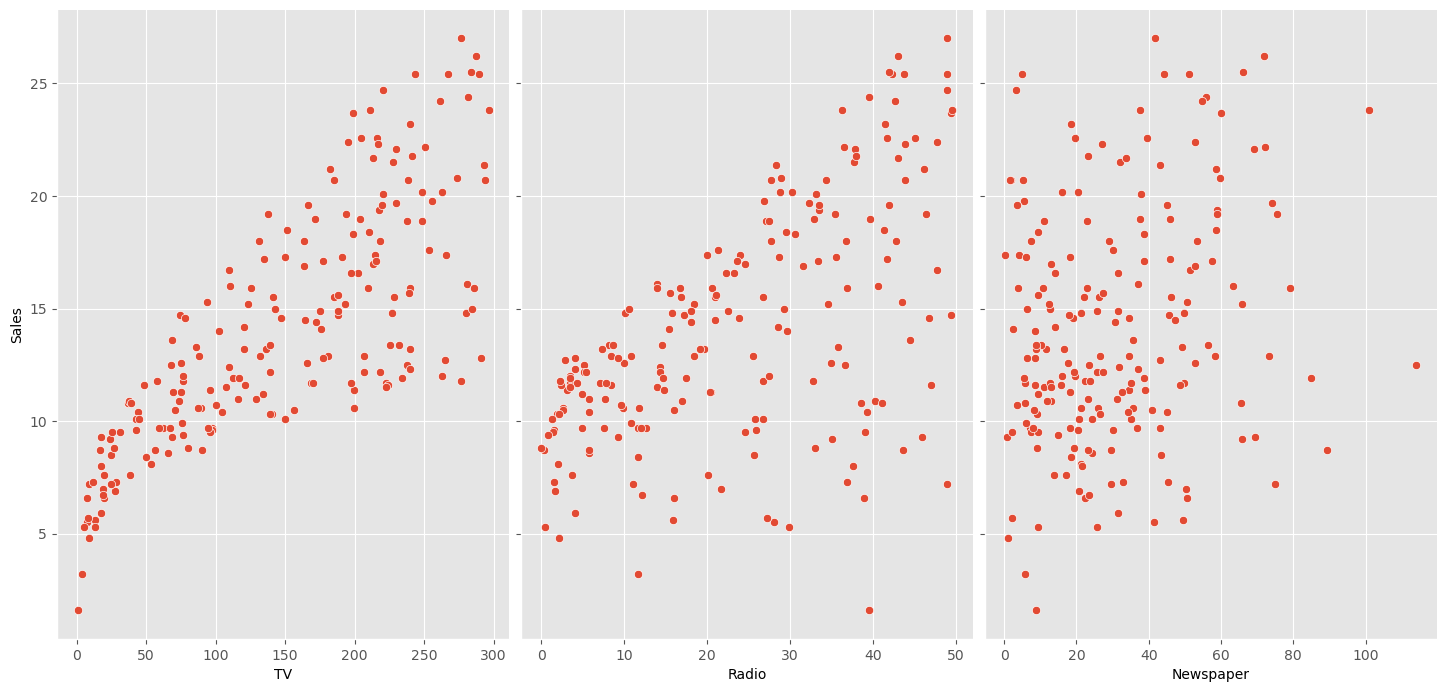

In [10]:
sns.pairplot(advert, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', 
             height=7, aspect=0.7)

# Task 4: Multiple Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
X = advert[ [ 'TV', 'Radio', 'Newspaper']]
y = advert.Sales
lm1 = LinearRegression() 
lm1.fit(X, y) 
print(lm1.intercept_) 
print(lm1.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [14]:
list(zip(['TV', 'Radio', 'Newspaper'], lm1.coef_))

[('TV', 0.045764645455397615),
 ('Radio', 0.18853001691820456),
 ('Newspaper', -0.0010374930424763272)]

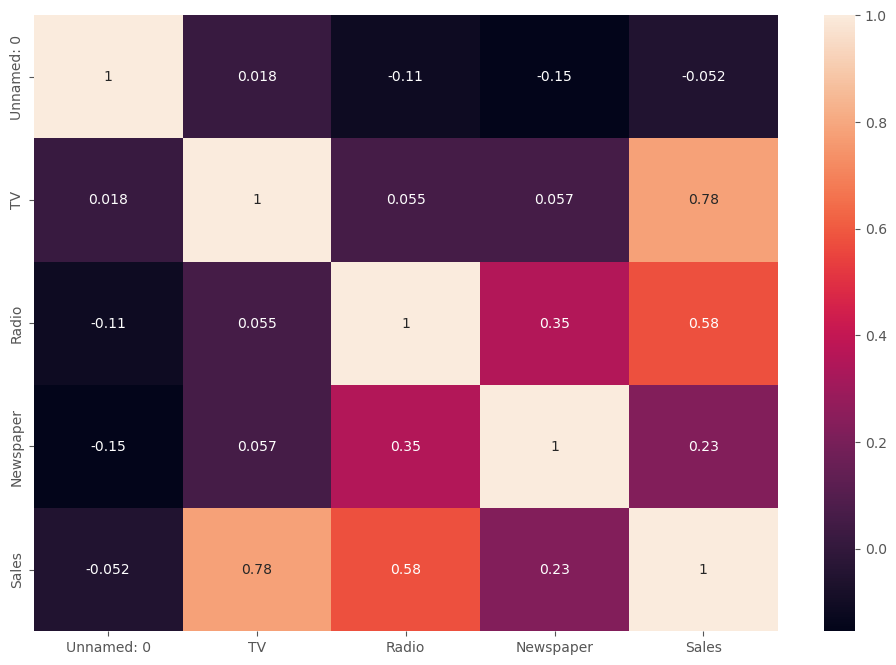

In [16]:
sns.heatmap(advert.corr(), annot =True);

# Task 5: Feature Selection

In [21]:
from sklearn.metrics import r2_score 
lm2 = LinearRegression().fit(X[['TV', 'Radio']], y)
lm2_preds = lm2.predict(X[['TV', 'Radio']]) 

print("R^2: ", r2_score (y, lm2_preds))

R^2:  0.8971942610828956


In [23]:
lm3 = LinearRegression().fit(X[['TV', 'Radio', 'Newspaper']], y) 
lm3_preds = lm3.predict(X[['TV', 'Radio', 'Newspaper']]) 

print("R^2: ", r2_score (y, lm3_preds)) 

R^2:  0.8972106381789522


# TASK 6: Model Evaluation Using Train/Test Split and Metrics

lets use train/test split with RMSE to see whether newspaper should be kept in the model:

In [31]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

X = advert[['TV', 'Radio', 'Newspaper']] 
y= advert.Sales 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 

lm4 = LinearRegression().fit(X_train, y_train) 
lm4_preds = lm4.predict(X_test) 

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm4_preds))) 
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE:  1.4046514230328955
R^2:  0.9156213613792232


In [32]:
X = advert[['TV', 'Radio']] 
y= advert.Sales 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 

lm5= LinearRegression().fit(X_train, y_train) 
lm5_preds = lm5.predict(X_test) 

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm5_preds))) 
print("R^2: ", r2_score (y_test, lm5_preds))

RMSE:  1.3879034699382888
R^2:  0.9176214942248908


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


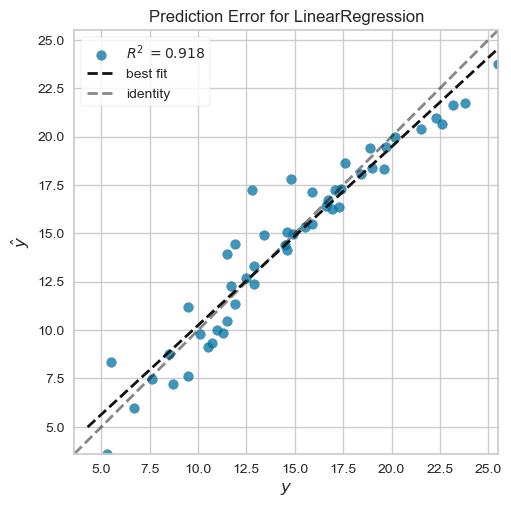

In [40]:
from yellowbrick.regressor import PredictionError, ResidualsPlot 

visualizer = PredictionError(lm5).fit(X_train, y_train) 
visualizer.score(X_test, y_test)
visualizer.poof(); 

# Task 7: Interaction Effect (Synergy)

In [43]:
advert['interaction'] = advert['TV']* advert['Radio'] 
X = advert [ [ 'TV', 'Radio', 'interaction']] 
y= advert.Sales 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 

lm6 = LinearRegression().fit(X_train, y_train) 
lm6_preds = lm6.predict(X_test) 

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm6_preds))) 
print("R^2: ", r2_score (y_test, lm6_preds)) 

RMSE:  0.7011871137164326
R^2:  0.9789736814681261


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


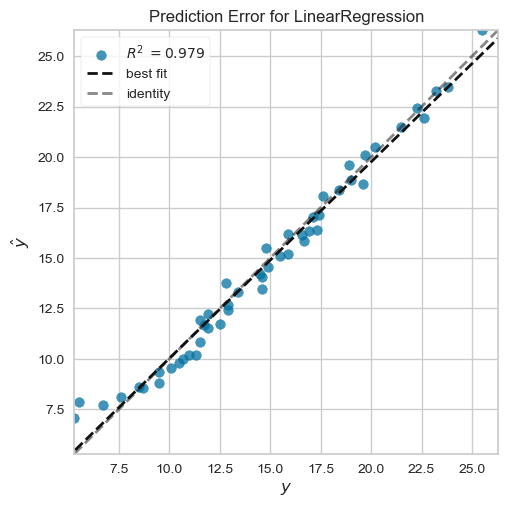

In [44]:
visualizer = PredictionError(lm6).fit(X_train, y_train) 
visualizer.score (X_test, y_test) 
visualizer.poof(); 